# SED616: Machine Learning - Reinforcement Learning

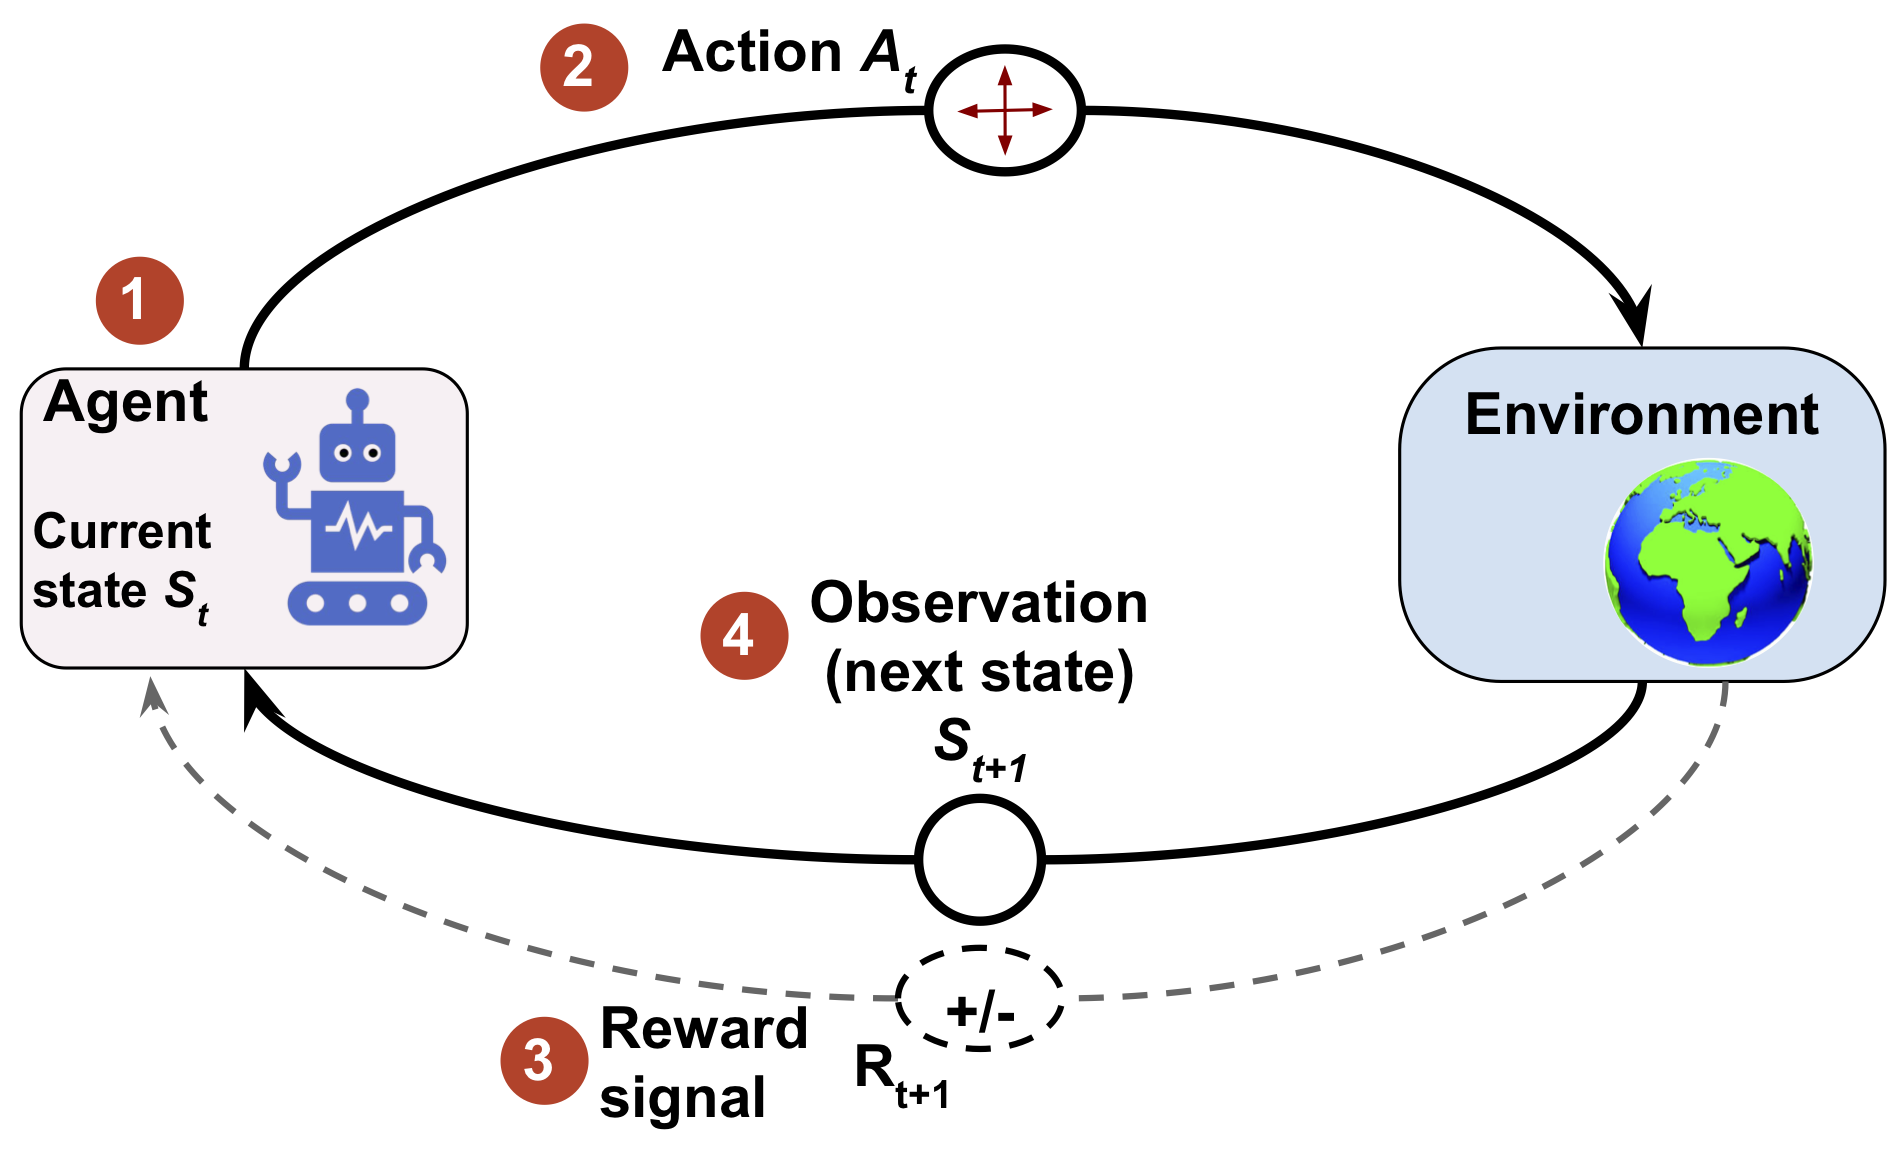

 https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch18/images/18_01.png

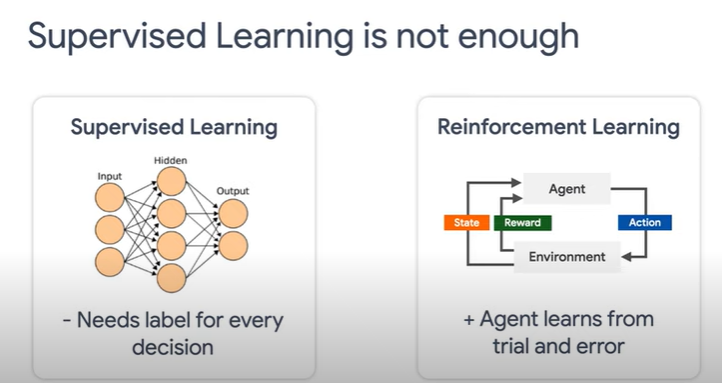

https://www.youtube.com/watch?v=52DTXidSVWc&list=PLQY2H8rRoyvxWE6bWx8XiMvyZFgg_25Q_&index=3

## OpenAI Gym: Cartpole
**State/Observation**
- the position of the cart, 
- the cart's velocity, 
- the angle of the pole, 
- the velocity of the tip of the pole

**Actions** 
- left (action=0) 
- right (action=1)

**Reward**
- The reward is 1 for every step taken for cartpole, including the termination step. Otherwise reward is 0

**Episode**
- The episode terminates when the angle of the pole becomes larger than 12 degrees(0.20944 radians) 
(from either side) with respect to an imaginary vertical axis, or when the position of the cart is more than 2.4 units from the center position.

In [65]:
import gym
env = gym.make("CartPole-v1")

In [66]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [67]:
env.action_space

Discrete(2)

In [68]:
#the pole's starting state:
env.reset()

(array([ 0.00588185, -0.01354039,  0.03923976, -0.01650424], dtype=float32),
 {})

In [69]:
env.step(action=0)

(array([ 0.00561104, -0.20920247,  0.03890968,  0.2882965 ], dtype=float32),
 1.0,
 False,
 False,
 {})

In [70]:
env.step(action=1)

(array([ 0.00142699, -0.01465636,  0.04467561,  0.00813477], dtype=float32),
 1.0,
 False,
 False,
 {})

### Policy : Random Movement



In [71]:
env.reset()
for i in range(20):
    action = env.action_space.sample()
    observation, reward, done, _, info  = env.step(action)
    print("step", i,"action",action, observation, reward, done, info)

step 0 action 1 [-0.00580082  0.23427518  0.00403655 -0.27020976] 1.0 False {}
step 1 action 1 [-0.00111531  0.4293393  -0.00136765 -0.56161684] 1.0 False {}
step 2 action 0 [ 0.00747147  0.23423657 -0.01259998 -0.26936507] 1.0 False {}
step 3 action 0 [ 0.01215621  0.03929667 -0.01798728  0.01931726] 1.0 False {}
step 4 action 0 [ 0.01294214 -0.15556277 -0.01760094  0.30627117] 1.0 False {}
step 5 action 0 [ 0.00983088 -0.35042953 -0.01147552  0.5933516 ] 1.0 False {}
step 6 action 1 [ 0.00282229 -0.15514885  0.00039152  0.29707617] 1.0 False {}
step 7 action 0 [-2.8068441e-04 -3.5027638e-01  6.3330396e-03  5.8988255e-01] 1.0 False {}
step 8 action 0 [-0.00728621 -0.54548645  0.01813069  0.8845536 ] 1.0 False {}
step 9 action 1 [-0.01819594 -0.3506153   0.03582176  0.5976251 ] 1.0 False {}
step 10 action 0 [-0.02520825 -0.5462197   0.04777427  0.90137285] 1.0 False {}
step 11 action 1 [-0.03613264 -0.35177645  0.06580172  0.624081  ] 1.0 False {}
step 12 action 1 [-0.04316817 -0.15763

### Render: CartPole

In [72]:
%%writefile cartpole1.py

import gym
env = gym.make("CartPole-v1")
env.reset()
for i in range(200):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, _, info = env.step(action)
    print("step", i, "action",action, observation, reward, done, info)
env.close()


Overwriting cartpole1.py


### Episode



In [73]:
%%writefile cartpoleEp.py

import gym
env = gym.make("CartPole-v1")

for episode in range(1, 11):
    score = 0
    state = env.reset()
    done = False
  
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, _, info = env.step(action)
        score += reward
        
    print('Episode:', episode, 'Score:', score)
env.close()

Overwriting cartpoleEp.py


### Policy: Agent Training

In [74]:
#https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import gym

env = gym.make("CartPole-v1")
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose=1)

model.learn(total_timesteps=20000)

model.save('cartpole_ppo_model')

Using cpu device


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 1.

### Agent Testing

In [ ]:
%%writefile cartpoleEval.py

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import gym
env = gym.make("CartPole-v1")

model = PPO.load('cartpole_ppo_model')
mean_rw, sd_rw = evaluate_policy(model, env, n_eval_episodes=10, render=True)
print('Reward: Mean',mean_rw , 'SD', sd_rw )
#Returns:Mean reward per episode, std of reward per episode


Overwriting cartpoleEval.py


In [ ]:
%%writefile cartpoleTest.py

from stable_baselines3 import PPO
import gym

env = gym.make("CartPole-v1")
model = PPO.load('cartpole_ppo_model')

for episode in range(1, 11):
    score = 0
    obs = env.reset()
    done = False
  
    while not done:
        env.render()
        action, _ = model.predict(obs) 
        obs, reward, done, info = env.step(action)
        score += reward
    print('Episode:', episode, 'Score:', score)
    
env.close()

Writing cartpoleTest.py


## MountainCar
https://www.gymlibrary.dev/environments/classic_control/mountain_car/

**Action**
- 0 : Accelerate to the left, 
- 1 : Don’t accelerate
- 2 : Accelerate to the right

**State/Observation**
- position 
- velocity

**Episode End**

The episode ends if either of the following happens:

- Termination: The position of the car is greater than or equal to 0.5 (the goal position on top of the right hill)

- Truncation: The length of the episode is 200.

In [ ]:
import gym

In [ ]:
env = gym.make("MountainCar-v0")
print(env.action_space)

Discrete(3)


In [ ]:
print(env.observation_space)

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [ ]:
env.reset()

array([-0.40193322,  0.        ], dtype=float32)

In [ ]:
%%writefile mountain1.py

import gym
env = gym.make("MountainCar-v0")
env.reset()
for i in range(200):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print("step", i, "action",action, observation, reward, done, info)
env.close()


Writing mountain1.py


In [ ]:
%%writefile mountainEp.py

import gym
env = gym.make("MountainCar-v0")

for episode in range(1, 11):
    score = 0
    state = env.reset()
    done = False
  
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score += reward
        
    print('Episode:', episode, 'Score:', score)
env.close()

Writing mountainEp.py


In [ ]:
#https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
# from stable_baselines3 import PPO
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import gym

env = gym.make("MountainCar-v0")
env = DummyVecEnv([lambda: env])
model = DQN('MlpPolicy', env, verbose=1)

model.learn(total_timesteps=200000)

model.save('mountaincar_ppo_model')

In [ ]:
%%writefile mountainEval.py

# from stable_baselines3 import PPO
from stable_baselines3 import DQN

from stable_baselines3.common.evaluation import evaluate_policy
import gym
env = gym.make("MountainCar-v0")

model = DQN.load('mountaincar_ppo_model')
mean_rw, sd_rw = evaluate_policy(model, env, n_eval_episodes=10, render=True)
print('Reward: Mean',mean_rw , 'SD', sd_rw )
#Returns:Mean reward per episode, std of reward per episode


Overwriting mountainEval.py


## Maze 
https://medium.com/geekculture/developing-reinforcement-learning-environment-using-openai-gym-f510b0393eb7